In [1]:
import warnings
warnings.simplefilter("ignore")
from analysis_utils import load_learning_curve_results

Notebook for plotting figures from the learning curve data where we plot RMSE and NLPD against number of data points
for the different test cases

In [2]:
results_df = load_learning_curve_results()

2023-05-31 16:03:19.917251: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


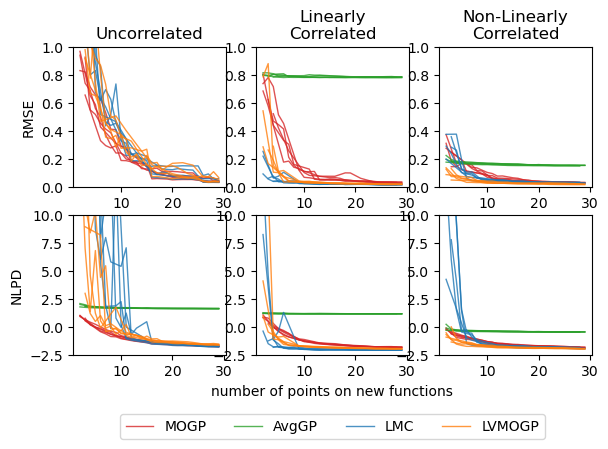

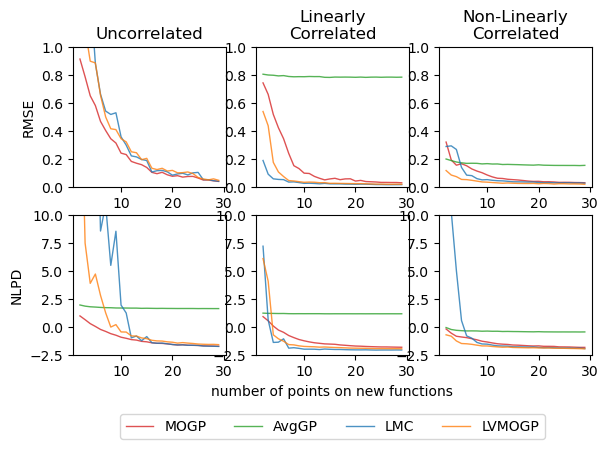

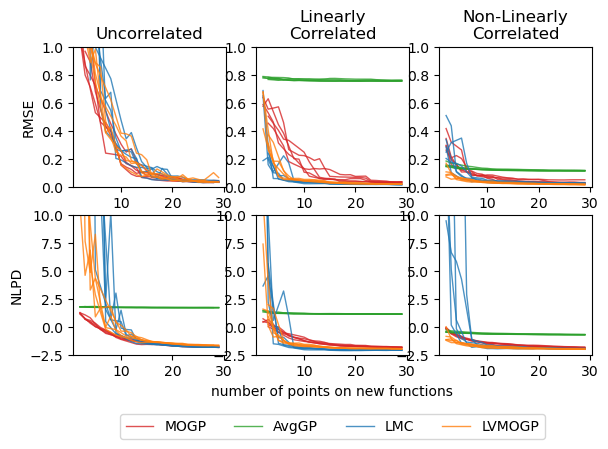

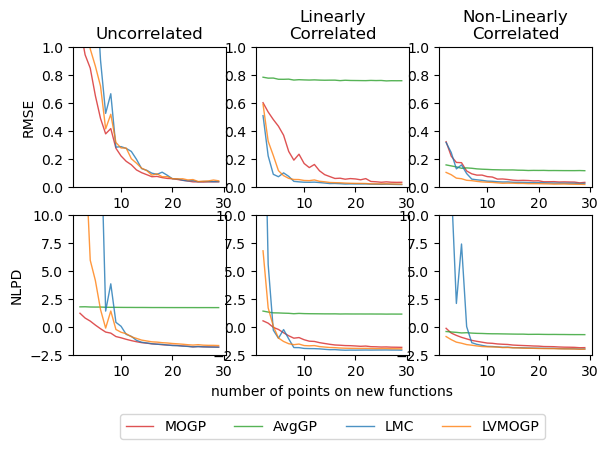

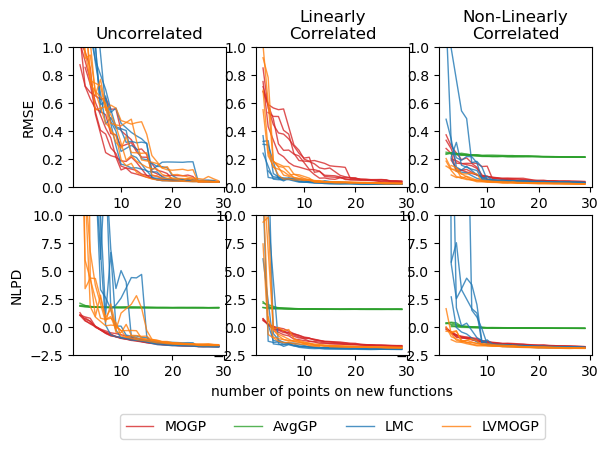

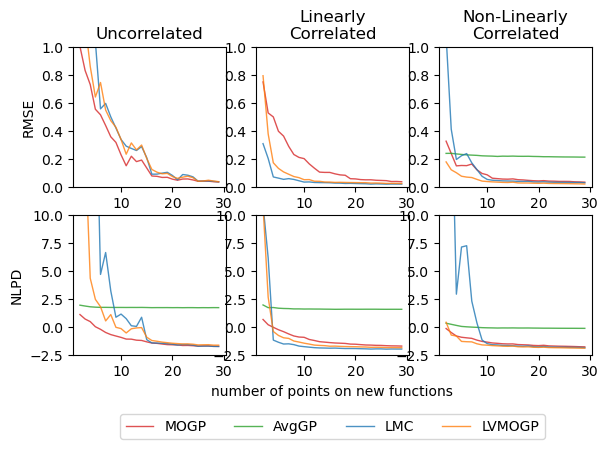

In [3]:
from plotting_utils import plot_learning_curve_results

for seeds in [[1], [2], [3]]:
    plot_learning_curve_results(results_df, seeds,  mean=False)
    plot_learning_curve_results(results_df, seeds, mean=True)

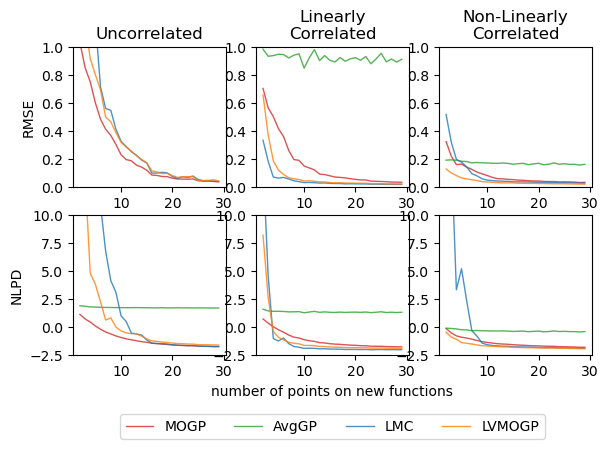

In [4]:
plot_learning_curve_results(results_df, [1,2, 3], mean=True)

In [5]:
print(results_df.columns)


Index(['model', 'nlpd', 'rmse', 'nlpd_new_surface', 'rmse_new_surface', 'lml',
       'seed', 'n_new_points', 'surface_type', 'n_new_fun', 'data_seed'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


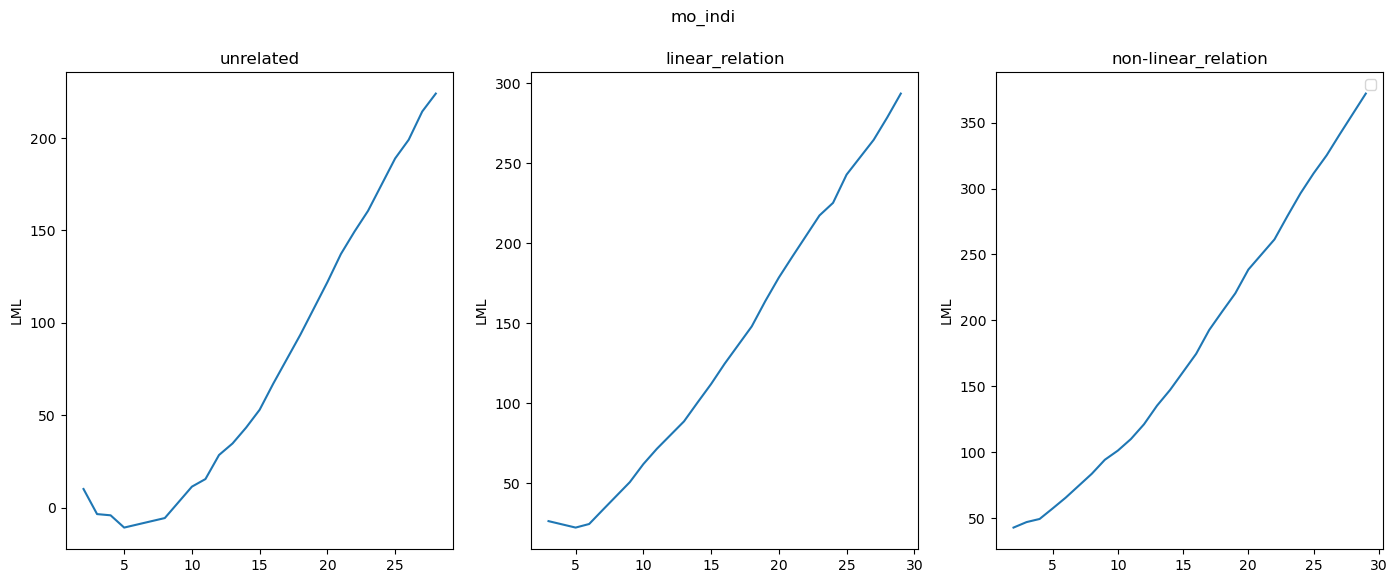

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


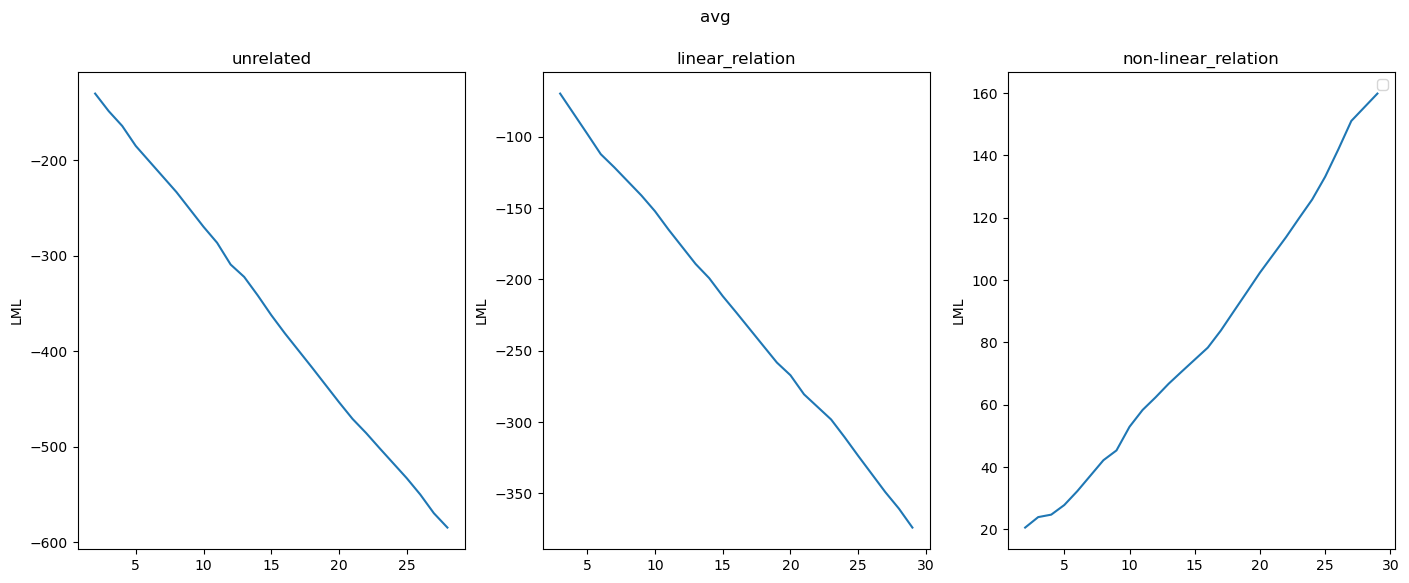

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


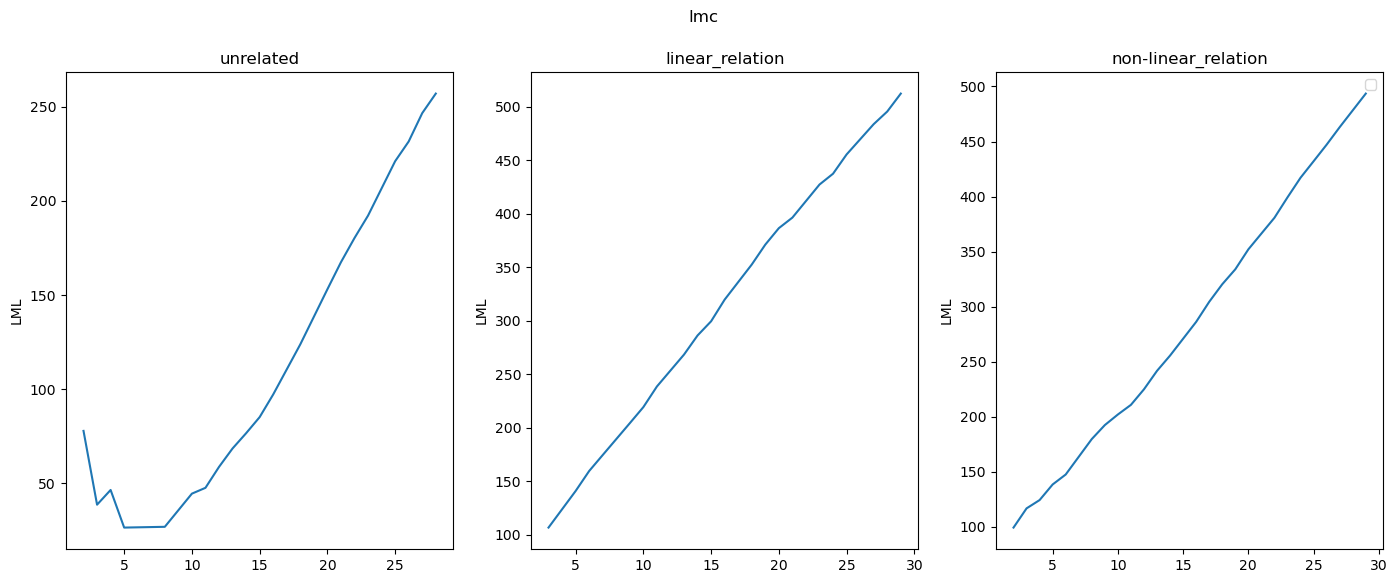

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


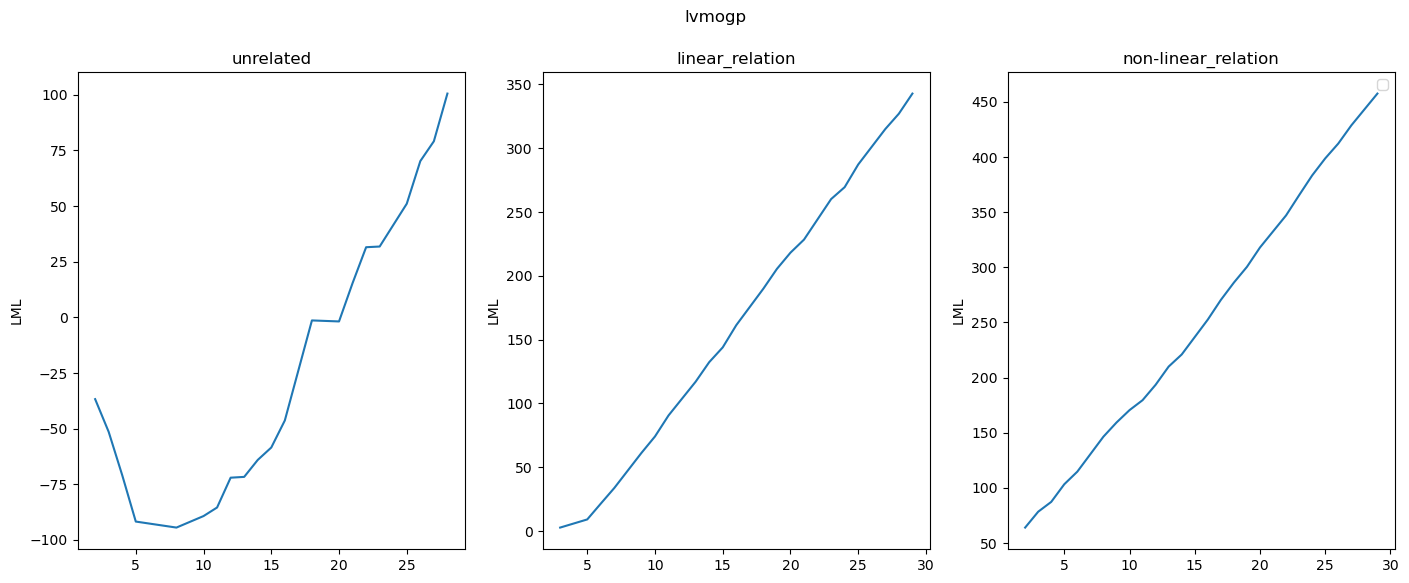

In [13]:
import matplotlib.pyplot as plt
surface_types = ['unrelated', 'linear_relation', 'non-linear_relation']

for model_name in ['mo_indi', 'avg', 'lmc', 'lvmogp']:
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(17, 6.2))
    ax = axs.flatten()
    for k, surface_type in enumerate(surface_types):
        df = results_df[(results_df['model'] == model_name) & (results_df['seed'] == 2) \
        & (results_df['data_seed'] == 1) & (results_df['surface_type'] == surface_type)]
        axs[k].plot(df['n_new_points'].to_numpy(), df['lml'].to_numpy())
        ax[k].set_title(surface_type)
        ax[k].set_ylabel('LML')
    plt.suptitle(model_name)
    plt.legend()
    plt.show()